### Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\K_ceo$\\Desktop\\DS'

In [3]:
mydata = pd.read_csv('Computer_Data.csv')

In [4]:
mydata.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25.0,80.0,4,14.0,NaN,no,yes,94,1
1,2,1795,33.0,85.0,2,14.0,NaN,no,yes,94,1
2,3,1595,25.0,170.0,4,15.0,NaN,no,yes,94,1
3,4,1849,25.0,170.0,8,14.0,no,no,no,94,1
4,5,3295,33.0,NaN,16,14.0,no,no,yes,94,1


In [5]:
mydata.tail()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
6254,6255,1690,100.0,528.0,8,15.0,no,no,yes,39,35
6255,6256,2223,66.0,850.0,16,15.0,yes,yes,yes,39,35
6256,6257,2654,100.0,1200.0,24,15.0,yes,no,yes,39,35
6257,6258,2195,100.0,850.0,16,15.0,yes,no,yes,39,35
6258,6259,2490,100.0,850.0,16,17.0,yes,no,yes,39,35


In [6]:
mydata = mydata.iloc[:,1:]
mydata.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25.0,80.0,4,14.0,NaN,no,yes,94,1
1,1795,33.0,85.0,2,14.0,NaN,no,yes,94,1
2,1595,25.0,170.0,4,15.0,NaN,no,yes,94,1
3,1849,25.0,170.0,8,14.0,no,no,no,94,1
4,3295,33.0,NaN,16,14.0,no,no,yes,94,1


In [7]:
mydata.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6252.000000,6257.000000,6259.000000,6255.000000,6259.000000,6259.000000
mean,2219.576610,52.008317,416.626179,8.286947,14.608793,221.301007,15.926985
std,580.803956,21.165948,258.586142,5.631099,0.905312,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    6259 non-null   int64  
 1   speed    6252 non-null   float64
 2   hd       6257 non-null   float64
 3   ram      6259 non-null   int64  
 4   screen   6255 non-null   float64
 5   cd       6252 non-null   object 
 6   multi    6259 non-null   object 
 7   premium  6254 non-null   object 
 8   ads      6259 non-null   int64  
 9   trend    6259 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 489.1+ KB


### Checking missing values

In [9]:
mydata.isnull().sum()

price      0
speed      7
hd         2
ram        0
screen     4
cd         7
multi      0
premium    5
ads        0
trend      0
dtype: int64

In [10]:
# speed - number
# hd - number
# screen - number
# cd - Charactor
# premium - Charactor
# For number : mean or median
# mean - no outlier
# median - outlier
# For char : mode


<AxesSubplot:ylabel='speed'>

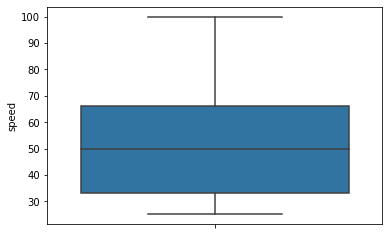

In [11]:
sns.boxplot(y='speed', data= mydata)

In [12]:
# no outlier found
mydata['speed'] = mydata['speed'].fillna(mydata['speed'].mean())

In [13]:
mydata.isnull().sum()

price      0
speed      0
hd         2
ram        0
screen     4
cd         7
multi      0
premium    5
ads        0
trend      0
dtype: int64

<AxesSubplot:ylabel='hd'>

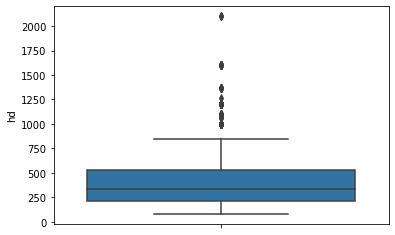

In [14]:
sns.boxplot(y='hd', data=mydata)

In [15]:
mydata['hd'] = mydata['hd'].fillna(mydata['hd'].median())

In [16]:
mydata.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     4
cd         7
multi      0
premium    5
ads        0
trend      0
dtype: int64

<AxesSubplot:ylabel='screen'>

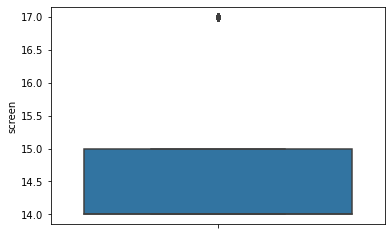

In [17]:
sns.boxplot(y='screen', data=mydata)

In [18]:
mydata['screen'] = mydata['screen'].fillna(mydata['screen'].median())

In [19]:
mydata.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         7
multi      0
premium    5
ads        0
trend      0
dtype: int64

In [20]:
# cd and premium are char variable
mydata['cd'].value_counts()

no     3344
yes    2908
Name: cd, dtype: int64

In [21]:
mydata['cd'] = mydata['cd'].fillna('no')

In [22]:
mydata.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    5
ads        0
trend      0
dtype: int64

In [23]:
mydata['premium'].value_counts()

yes    5642
no      612
Name: premium, dtype: int64

In [24]:
mydata['premium'] = mydata['premium'].fillna('yes')

In [25]:
mydata.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

### Encoding 

In [26]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    6259 non-null   int64  
 1   speed    6259 non-null   float64
 2   hd       6259 non-null   float64
 3   ram      6259 non-null   int64  
 4   screen   6259 non-null   float64
 5   cd       6259 non-null   object 
 6   multi    6259 non-null   object 
 7   premium  6259 non-null   object 
 8   ads      6259 non-null   int64  
 9   trend    6259 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 489.1+ KB


In [27]:
# 5   cd       6259 non-null   object 
# 6   multi    6259 non-null   object 
# 7   premium  6259 non-null   object

In [28]:
# Label Encoder
mydata['cd'] = mydata['cd'].astype('category')
mydata['cd'] = mydata['cd'].cat.codes

In [29]:
mydata.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25.0,80.0,4,14.0,0,no,yes,94,1
1,1795,33.0,85.0,2,14.0,0,no,yes,94,1
2,1595,25.0,170.0,4,15.0,0,no,yes,94,1
3,1849,25.0,170.0,8,14.0,0,no,no,94,1
4,3295,33.0,340.0,16,14.0,0,no,yes,94,1


In [30]:
# one hot encoder
mydata = pd.get_dummies(mydata, columns=['cd'])

In [31]:
mydata.head()

,price,speed,hd,ram,screen,multi,premium,ads,trend,cd_0,cd_1
0,1499,25.0,80.0,4,14.0,no,yes,94,1,1,0
1,1795,33.0,85.0,2,14.0,no,yes,94,1,1,0
2,1595,25.0,170.0,4,15.0,no,yes,94,1,1,0
3,1849,25.0,170.0,8,14.0,no,no,94,1,1,0
4,3295,33.0,340.0,16,14.0,no,yes,94,1,1,0


In [32]:
mydata['multi'] = mydata['multi'].astype('category')
mydata['multi'] = mydata['multi'].cat.codes

In [33]:
mydata.head()

,price,speed,hd,ram,screen,multi,premium,ads,trend,cd_0,cd_1
0,1499,25.0,80.0,4,14.0,0,yes,94,1,1,0
1,1795,33.0,85.0,2,14.0,0,yes,94,1,1,0
2,1595,25.0,170.0,4,15.0,0,yes,94,1,1,0
3,1849,25.0,170.0,8,14.0,0,no,94,1,1,0
4,3295,33.0,340.0,16,14.0,0,yes,94,1,1,0


In [34]:
mydata = pd.get_dummies(mydata, columns=['multi'])

In [35]:
mydata.head()

,price,speed,hd,ram,screen,premium,ads,trend,cd_0,cd_1,multi_0,multi_1
0,1499,25.0,80.0,4,14.0,yes,94,1,1,0,1,0
1,1795,33.0,85.0,2,14.0,yes,94,1,1,0,1,0
2,1595,25.0,170.0,4,15.0,yes,94,1,1,0,1,0
3,1849,25.0,170.0,8,14.0,no,94,1,1,0,1,0
4,3295,33.0,340.0,16,14.0,yes,94,1,1,0,1,0


In [36]:
mydata['premium'] = mydata['premium'].astype('category')
mydata['premium'] = mydata['premium'].cat.codes
mydata.head()

,price,speed,hd,ram,screen,premium,ads,trend,cd_0,cd_1,multi_0,multi_1
0,1499,25.0,80.0,4,14.0,1,94,1,1,0,1,0
1,1795,33.0,85.0,2,14.0,1,94,1,1,0,1,0
2,1595,25.0,170.0,4,15.0,1,94,1,1,0,1,0
3,1849,25.0,170.0,8,14.0,0,94,1,1,0,1,0
4,3295,33.0,340.0,16,14.0,1,94,1,1,0,1,0


In [37]:
mydata = pd.get_dummies(mydata, columns=['premium'])

In [38]:
mydata.head()

,price,speed,hd,ram,screen,ads,trend,cd_0,cd_1,multi_0,multi_1,premium_0,premium_1
0,1499,25.0,80.0,4,14.0,94,1,1,0,1,0,0,1
1,1795,33.0,85.0,2,14.0,94,1,1,0,1,0,0,1
2,1595,25.0,170.0,4,15.0,94,1,1,0,1,0,0,1
3,1849,25.0,170.0,8,14.0,94,1,1,0,1,0,1,0
4,3295,33.0,340.0,16,14.0,94,1,1,0,1,0,0,1


In [39]:
# dummy variable : n-1
mydata = mydata.drop(['cd_0','multi_0','premium_0'], axis=1)

In [40]:
mydata.head()

,price,speed,hd,ram,screen,ads,trend,cd_1,multi_1,premium_1
0,1499,25.0,80.0,4,14.0,94,1,0,0,1
1,1795,33.0,85.0,2,14.0,94,1,0,0,1
2,1595,25.0,170.0,4,15.0,94,1,0,0,1
3,1849,25.0,170.0,8,14.0,94,1,0,0,0
4,3295,33.0,340.0,16,14.0,94,1,0,0,1


In [41]:
# splitting the data into dep and ind variable
y = mydata.iloc[:,0] # dep variable
x = mydata.iloc[:,1:] # ind variable

In [42]:
x

,speed,hd,ram,screen,ads,trend,cd_1,multi_1,premium_1
0,25.0,80.0,4,14.0,94,1,0,0,1
1,33.0,85.0,2,14.0,94,1,0,0,1
2,25.0,170.0,4,15.0,94,1,0,0,1
3,25.0,170.0,8,14.0,94,1,0,0,0
4,33.0,340.0,16,14.0,94,1,0,0,1
...,...,...,...,...,...,...,...,...,...
6254,100.0,528.0,8,15.0,39,35,0,0,1
6255,66.0,850.0,16,15.0,39,35,1,1,1
6256,100.0,1200.0,24,15.0,39,35,1,0,1
6257,100.0,850.0,16,15.0,39,35,1,0,1


In [43]:
y

0       1499
1       1795
2       1595
3       1849
4       3295
        ... 
6254    1690
6255    2223
6256    2654
6257    2195
6258    2490
Name: price, Length: 6259, dtype: int64

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [45]:
x

array([[-1.27684306, -1.30199424, -0.76135926, ..., -0.93155819,
        -0.40260016,  0.3292053 ],
       [-0.8986357 , -1.28265396, -1.1165581 , ..., -0.93155819,
        -0.40260016,  0.3292053 ],
       [-1.27684306, -0.95386919, -0.76135926, ..., -0.93155819,
        -0.40260016,  0.3292053 ],
       ...,
       [ 2.26885097,  3.03022861,  2.79062911, ...,  1.07347025,
        -0.40260016,  0.3292053 ],
       [ 2.26885097,  1.67640897,  1.36983376, ...,  1.07347025,
        -0.40260016,  0.3292053 ],
       [ 2.26885097,  1.67640897,  1.36983376, ...,  1.07347025,
        -0.40260016,  0.3292053 ]])

In [46]:
mydata.head()

,price,speed,hd,ram,screen,ads,trend,cd_1,multi_1,premium_1
0,1499,25.0,80.0,4,14.0,94,1,0,0,1
1,1795,33.0,85.0,2,14.0,94,1,0,0,1
2,1595,25.0,170.0,4,15.0,94,1,0,0,1
3,1849,25.0,170.0,8,14.0,94,1,0,0,0
4,3295,33.0,340.0,16,14.0,94,1,0,0,1


In [47]:
mydata.corr()

,price,speed,hd,ram,screen,ads,trend,cd_1,multi_1,premium_1
price,1.000000,0.300514,0.430258,0.622748,0.295928,0.054540,-0.199987,0.197343,-0.016651,-0.080696
speed,0.300514,1.000000,0.372236,0.234807,0.189243,-0.215051,0.405750,0.258423,0.084238,0.114185
hd,0.430258,0.372236,1.000000,0.777726,0.233101,-0.323222,0.577790,0.503570,0.092805,0.196924
ram,0.622748,0.234807,0.777726,1.000000,0.209088,-0.181670,0.276844,0.438504,0.045497,0.197145
screen,0.295928,0.189243,0.233101,0.209088,1.000000,-0.093315,0.189276,0.129811,-0.001598,0.018628
ads,0.054540,-0.215051,-0.323222,-0.181670,-0.093315,1.000000,-0.318553,-0.061091,-0.030394,-0.152023
trend,-0.199987,0.405750,0.577790,0.276844,0.189276,-0.318553,1.000000,0.445780,0.210907,0.042107
cd_1,0.197343,0.258423,0.503570,0.438504,0.129811,-0.061091,0.445780,1.000000,0.432179,0.216077
multi_1,-0.016651,0.084238,0.092805,0.045497,-0.001598,-0.030394,0.210907,0.432179,1.000000,0.124775
premium_1,-0.080696,0.114185,0.196924,0.197145,0.018628,-0.152023,0.042107,0.216077,0.124775,1.000000


<AxesSubplot:>

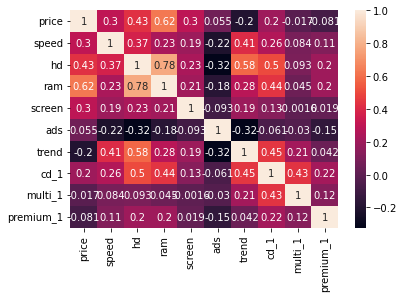

In [48]:
sns.heatmap(mydata.corr(), annot = True)

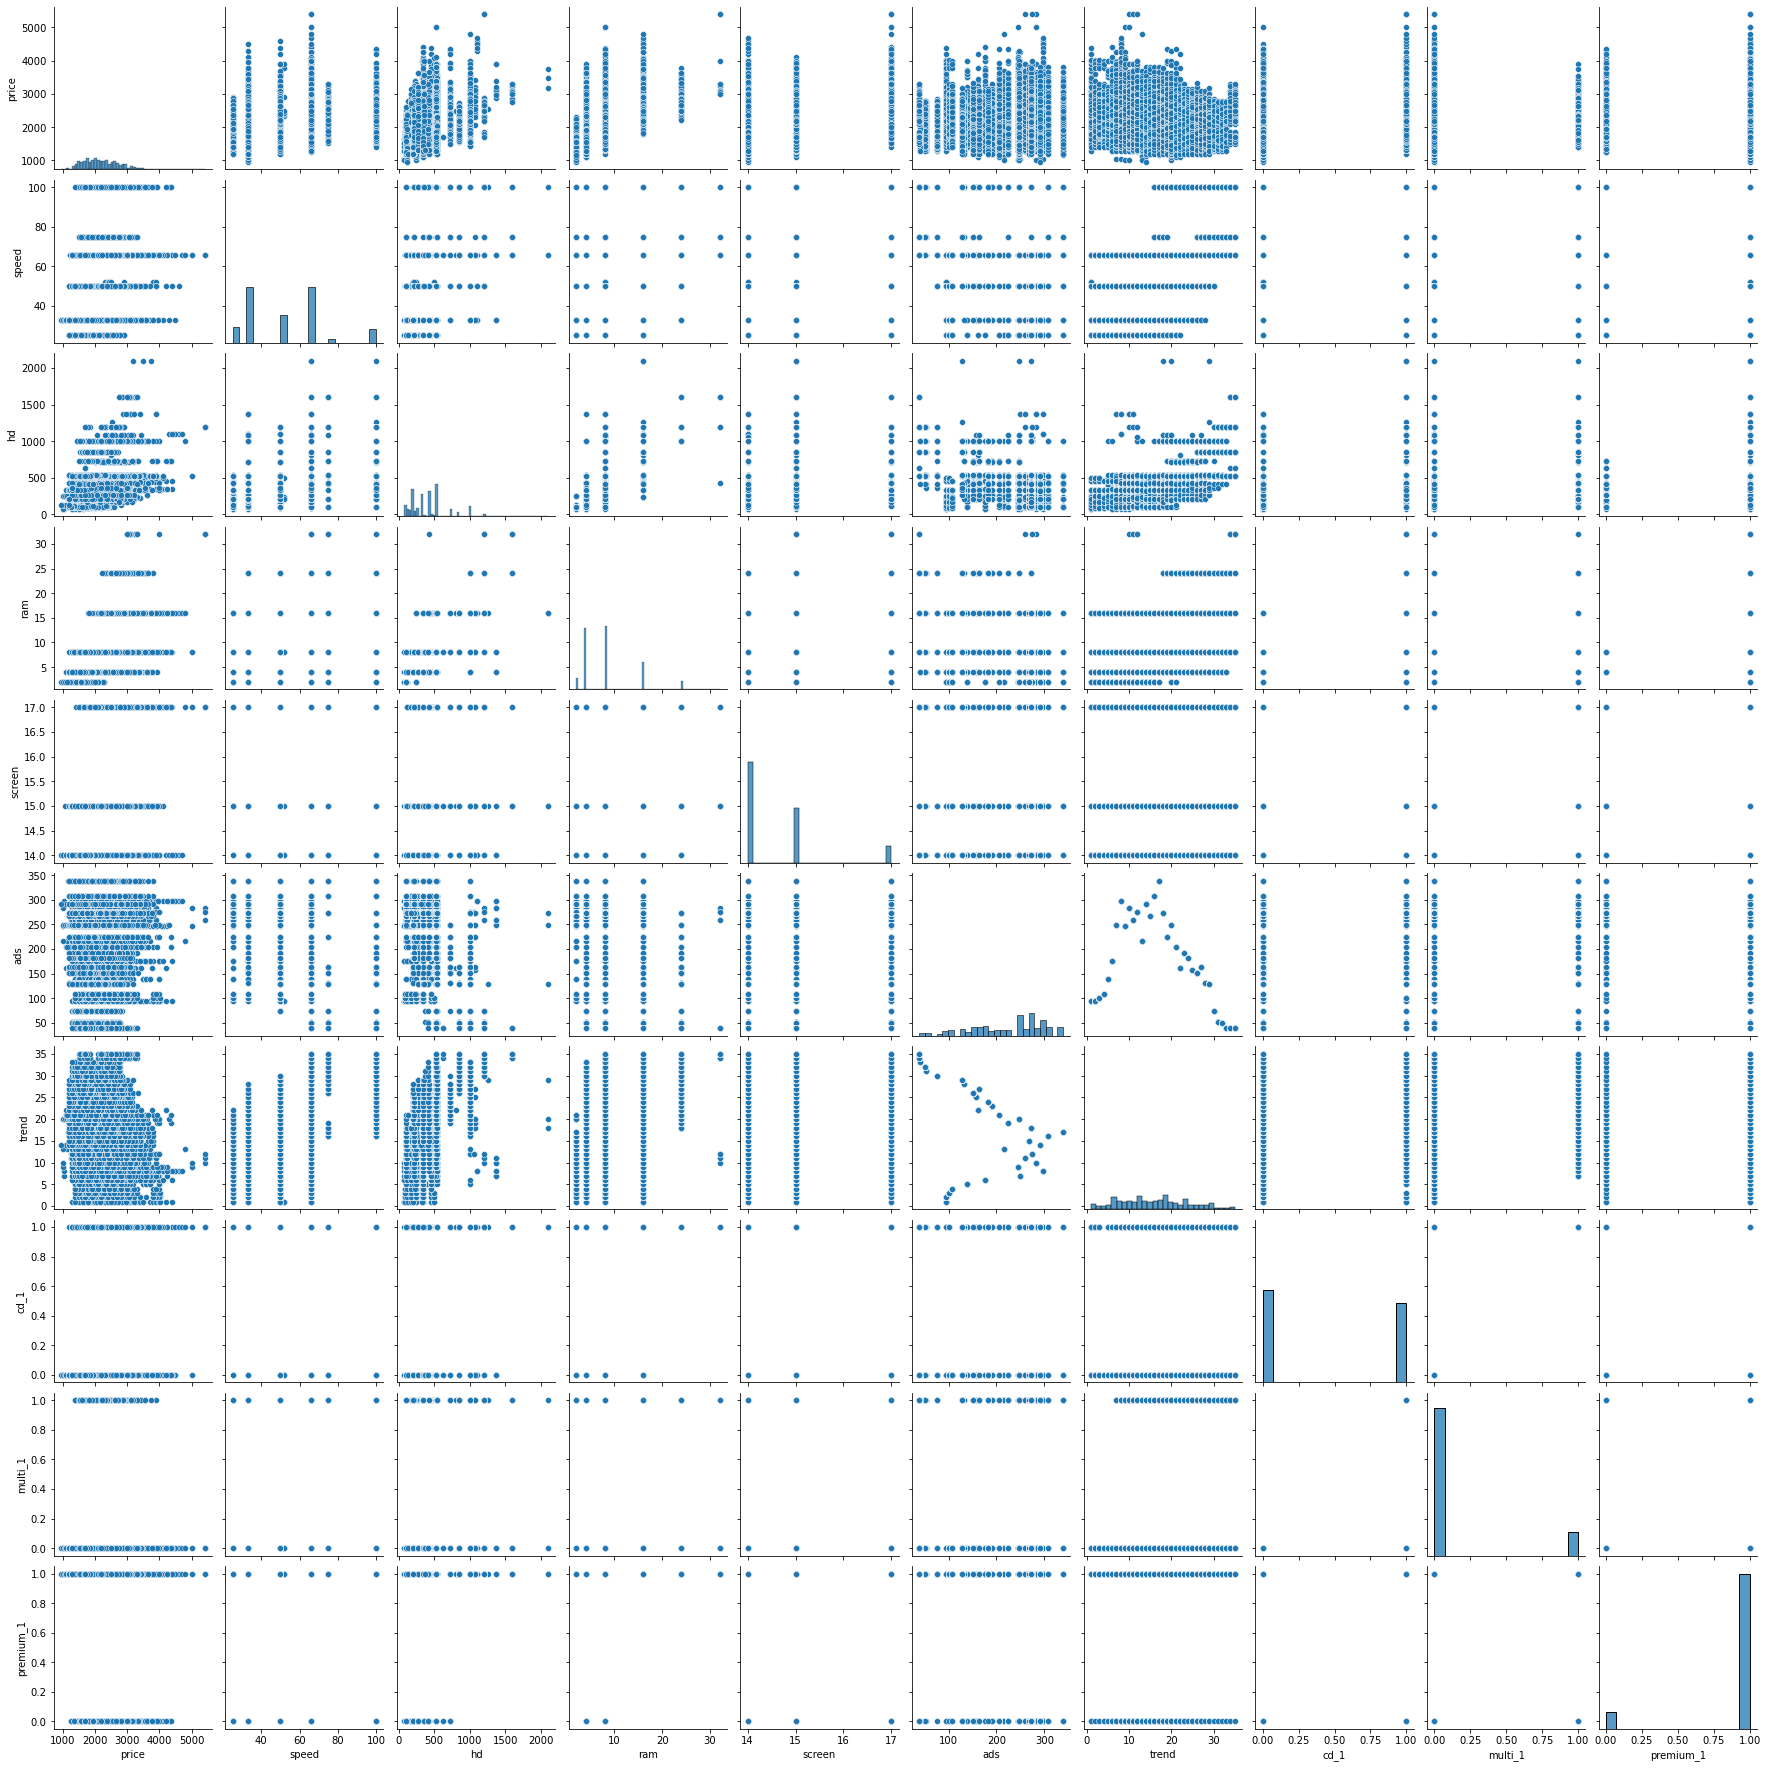

In [49]:
sns.pairplot(mydata)

In [50]:
# Splitting the data into train and test for building model and prediction

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75,random_state=101)

In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4694, 9)
(4694,)
(1565, 9)
(1565,)


### Model Building - Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

In [54]:
reg_model.coef_

array([ 196.68774529,  200.22139296,  276.53544097,  109.18602174,
         48.94019428, -408.0560839 ,   28.50417237,   37.02064809,
       -151.03809137])

In [55]:
reg_model.intercept_

2219.301883270103

### Predict the model 

In [56]:
# high bias and high variance 
y_pred = reg_model.predict(x_test)

In [57]:
y_pred

array([2475.12410354, 2063.79513953, 2180.53057424, ..., 2010.85122781,
       1858.05710601, 2470.45669917])

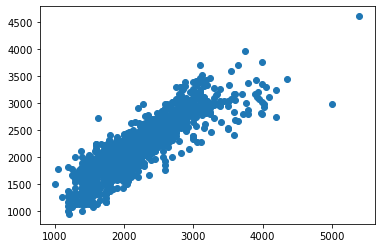

In [58]:
plt.scatter(y_test, y_pred)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

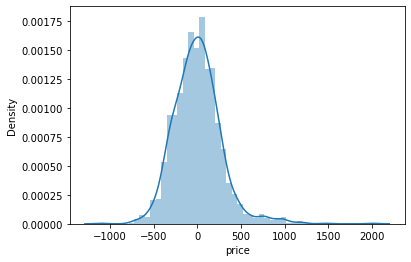

In [59]:
sns.distplot((y_test-y_pred))

In [60]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sf

In [61]:
model = sf.OLS(endog = y_train, exog = x_train).fit()

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.055
Model:                            OLS   Adj. R-squared (uncentered):              0.053
Method:                 Least Squares   F-statistic:                              30.26
Date:                Sat, 30 Apr 2022   Prob (F-statistic):                    6.98e-52
Time:                        19:32:33   Log-Likelihood:                         -42863.
No. Observations:                4694   AIC:                                  8.574e+04
Df Residuals:                    4685   BIC:                                  8.580e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           187.6103     37.049      5.064      0.000     114.977     260.244
x2           235.5406     66.506      3.542      0.000     105.157     365.924
x3           292.3173     55.575      5.260      0.000     183.363     401.271
x4           101.5444     34.153      2.973      0.003      34.588     168.501
x5            59.6457     36.246      1.646      0.100     -11.414     130.705
x6          -411.4207     46.580     -8.833      0.000    -502.740    -320.102
x7            15.6676     44.617      0.351      0.725     -71.802     103.137
x8            51.3215     36.953      1.389      0.165     -21.123     123.766
x9          -147.6188     34.649     -4.260      0.000    -215.547     -79.690
==============================================================================
Omnibus:                      683.673   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1878.891
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       5.668   Cond. No.                         4.59
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""